# The Sparks Foundation

### GRIP : Data Science & Business Analytics Internship

#### Auther : Rahul Kumar

#### Task 1st - Prediction Using Supervised ML (Predict the percentage of student based on no. of study hours)

###### Step 1- Import python library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

###### Step 2 - Importing Data Set from url

In [2]:
url= 'http://bit.ly/w-data'
data = pd.read_csv(url)
print("Data imported")
data

Data imported


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
#Print first 5 record from dataset
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
#Print last 5 record from dataset
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [5]:
# Data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
# Checking the summary of data (like: count, add, std, min, max, mean)
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
# Checking for null values
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [8]:
# Checking for Correlation
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


### Visualization of the data set

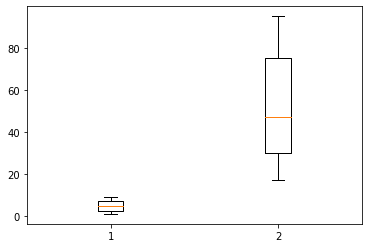

In [9]:
# Performing box plot graph using Seaborn Libraries
plt.boxplot(data)
plt.show()

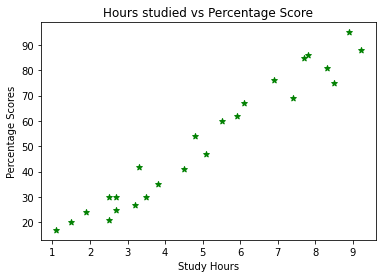

In [14]:
# Performing a scatter graph
plt.xlabel('Study Hours' )
plt.ylabel('Percentage Scores')
plt.title('Hours studied vs Percentage Score')
plt.scatter(data.Hours, data.Scores, color="green", marker="*")
plt.show()

In [11]:
##### assigning the values of hours and score to the variable
hours = data['Hours']
score = data['Scores']

In [15]:
x = data.iloc[:,:-1].values
y = data.iloc[:, 1].values
print(x)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]


In [16]:
print(y)

[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


#### Preparing Data and splitting into train and test sets

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [20]:
# we have splitting out data using 80:20 RULE
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [21]:
x_train

array([[2.7],
       [3.3],
       [5.1],
       [3.8],
       [1.5],
       [3.2],
       [4.5],
       [8.9],
       [8.5],
       [3.5],
       [2.7],
       [1.9],
       [4.8],
       [6.1],
       [7.8],
       [5.5],
       [7.7],
       [1.1],
       [7.4],
       [9.2]])

In [22]:
y_train

array([25, 42, 47, 35, 20, 27, 41, 95, 75, 30, 30, 24, 54, 67, 86, 60, 85,
       17, 69, 88], dtype=int64)

In [23]:
x_test

array([[8.3],
       [2.5],
       [2.5],
       [6.9],
       [5.9]])

In [24]:
y_test

array([81, 30, 21, 76, 62], dtype=int64)

#### Training the linear regression model

In [25]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

#### Plotting the line of regression

In [26]:
line = lr.coef_*x+lr.intercept_

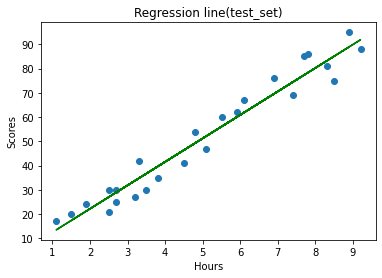

In [32]:
# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line, color='green');
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Regression line(test_set)')
plt.show()

#### Predicting Results

In [34]:
y_pred = lr.predict(x_test)
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
data

,Actual,Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


#### Comparing actual and predicted values

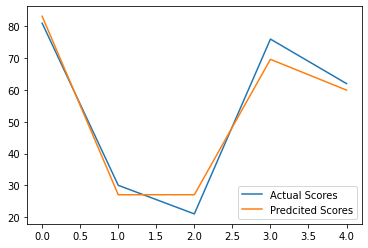

In [40]:
plt.plot(y_test)
plt.plot(y_pred)
plt.legend(["Actual Scores", "Predcited Scores"], loc ="lower right") 
plt.show()

#### Predicted score if a student studies for 9.25 hrs/ day

In [42]:
hours = 9.25
hours = np.array(hours).reshape(-1,1)
own_pred = lr.predict(hours)
print("No. of Hours = {}".format(hours))
print("Predicted Score is = {}".format(own_pred[0]))

No. of Hours = [[9.25]]
Predicted Score is = 92.38611528261494


In [43]:
# Checking the mean absolute error
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3.9207511902099244
Root Mean Squared Error: 4.352380006653288


### Task End